In [98]:
import numpy as np
import pandas as pd
import re
import csv
import io

with open('data.text') as f:
    content = f.readlines()

with open('data-2.text') as f:
    content2 = f.readlines()

In [99]:
for i in range(len(content)):
    content[i]= re.sub("\s+", ",", content[i].strip())
    
for i in range(len(content2)):
    content2[i]= re.sub("\s+", ",", content2[i].strip())

In [102]:
df = pd.DataFrame([sub.split(",") for sub in content])

df2 = pd.DataFrame([sub.split(",") for sub in content2])

In [103]:
df.columns = df.iloc[0]

df = df.iloc[2:] 

df2.columns = df2.iloc[0]

df2 = df2.iloc[2:] 

In [104]:
df.set_index('Year', inplace=True)
df2.set_index('Year', inplace=True)

In [140]:
unionData = df.join(df2)
unionData

,Finland,Sweden,Norway,Denmark,Netherlands,None,States,Canada,Australia,Zealand,Japan
Year,,,,,,,,,,,
1970,51.3,67.7,56.8,60.3,36.5,None,23.5,31.0,950.2,55.2,35.1
1980,69.4,78.0,58.3,78.6,34.8,None,19.5,34.7,49.5,69.1,31.1
1990,72.5,80.8,58.5,75.3,24.3,None,15.5,32.9,40.5,51.0,25.4
1991,75.4,80.6,58.1,75.8,24.1,None,15.5,--,--,44.4,24.8
1992,78.4,83.3,58.1,75.8,25.2,None,15.1,33.1,39.6,37.1,24.5
1993,80.7,83.9,58.0,77.3,25.9,None,15.1,32.8,37.6,34.5,24.3
1994,80.3,83.8,57.8,77.5,25.6,None,14.9,--,35.0,30.2,24.3
1995,80.4,83.1,57.3,77.0,25.7,None,14.3,--,32.7,27.6,24.0
1996,80.4,82.7,56.3,77.1,25.1,None,14.0,--,31.1,24.9,23.4


In [148]:
unionData = unionData.apply(pd.to_numeric, args=('coerce',))


unionData["Australia"][0] = 50.2
unionData

,Finland,Sweden,Norway,Denmark,Netherlands,None,States,Canada,Australia,Zealand,Japan
Year,,,,,,,,,,,
1970,51.3,67.7,56.8,60.3,36.5,NaN,23.5,31.0,50.2,55.2,35.1
1980,69.4,78.0,58.3,78.6,34.8,NaN,19.5,34.7,49.5,69.1,31.1
1990,72.5,80.8,58.5,75.3,24.3,NaN,15.5,32.9,40.5,51.0,25.4
1991,75.4,80.6,58.1,75.8,24.1,NaN,15.5,NaN,NaN,44.4,24.8
1992,78.4,83.3,58.1,75.8,25.2,NaN,15.1,33.1,39.6,37.1,24.5
1993,80.7,83.9,58.0,77.3,25.9,NaN,15.1,32.8,37.6,34.5,24.3
1994,80.3,83.8,57.8,77.5,25.6,NaN,14.9,NaN,35.0,30.2,24.3
1995,80.4,83.1,57.3,77.0,25.7,NaN,14.3,NaN,32.7,27.6,24.0
1996,80.4,82.7,56.3,77.1,25.1,NaN,14.0,NaN,31.1,24.9,23.4


(array(0.0), array(12.0))

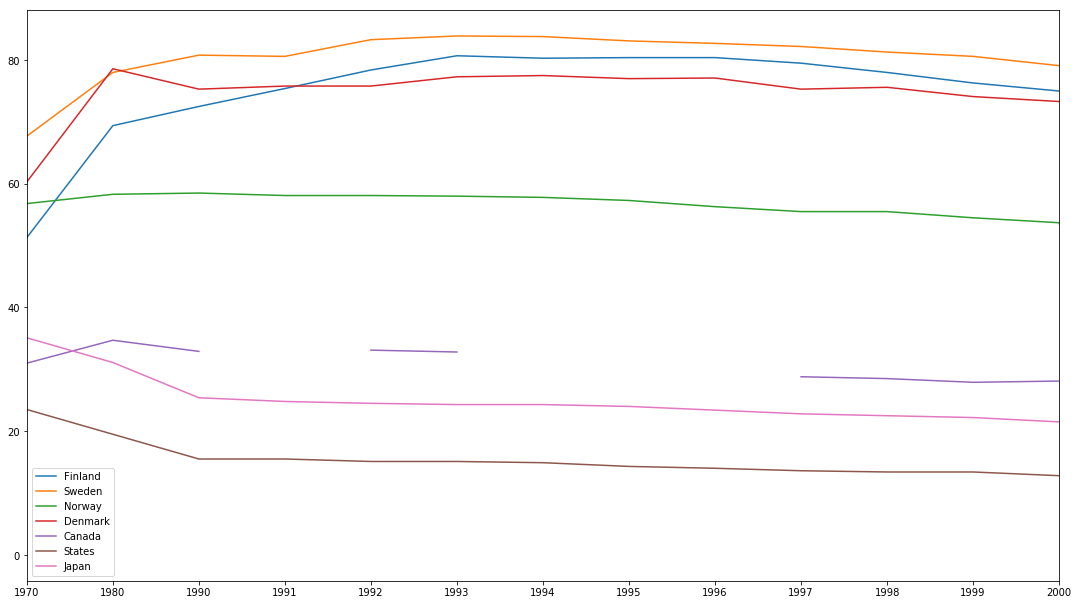

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)


for name in ["Finland", "Sweden", "Norway", "Denmark", "Canada", "States", "Japan"]:
    ax.plot(unionData[name], label=name)

ax.legend()
ax.set_xlim([1970, 2000])

